<a href="https://colab.research.google.com/github/caraujom/Labs_IH/blob/main/class_7_01_7_02_7_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [ ]:
data=pd.read_csv('learningSet.txt')
data.shape
#aquí nos vamos cuenta que temeos "DEMASIADAS" columnas... y quizá tendremos que recordar muchas
#ya por nulos o porque no aportan información

(95412, 481)

In [ ]:
##lo primerito es quitar columnas con alto valor de nulos
#vamos a proponer un valor en este caso, del 25% para umbral de nulos

#revisar métodos (llevan paréntesis) y características (no llevan paréntesis) de los objetos
nulls_percent_df=pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns=['column_name','nulls_percentage']

In [ ]:
nulls_percent_df


,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [ ]:
columns_above_threshold=nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
len(columns_above_threshold)

#columns_above_threshold

drop_list=list(columns_above_threshold['column_name'])
drop_list

In [ ]:
nulls_percent_df.columns

Index(['column_name', 'nulls_percentage'], dtype='object')

In [ ]:
##de aquí se tomaría la decisión de borrar o no las 72 columnas resultantes

In [ ]:
#lo que seguiría es separar los datos en Target(s), info numérica , info categórica

In [ ]:
Y=data[['TARGET_B','TARGET_D']]
Y

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [ ]:
#separamos los datos en T, N, C, una vez que ya estamos seguro que no vamos a borrar renglones
numerical=data.select_dtypes(np.number)
numerical=numerical.drop(columns=['TARGET_B','TARGET_D'])
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [ ]:
categorical=data.select_dtypes(np.object)
categorical

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,XXXX,C2,27,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,XXXX,C1,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,XXXX,C3,30,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,XXXX,C1,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [ ]:
#temeos que empezar revisar las cateogrías
categorical['STATE'].value_counts()
#vamos apropner que para esta columna, abajo de 2500, es una cateogoría monoritaria que podemos
#juntar junsto als demás minoritarias

df=pd.DataFrame(categorical['STATE'].value_counts()).reset_index()
df

,index,STATE
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [ ]:
other_states=list(df[df['STATE']<2500]['index'])

In [ ]:
other_states

In [ ]:
def clean_state(x):
  x=str(x)
  if x in other_states: return 'other'
  else: return x

categorical['STATE']=list(map(clean_state,categorical['STATE']))

In [ ]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [ ]:
#lo que sigue es buscar si este proceso aplica para alguna otra columna. (en este caso no)

In [ ]:
type(drop_list)

list

In [ ]:
cols = ['WEALTH1', 'WEALTH2']


In [ ]:
for item in cols:
    drop_list.remove(item) #recordar que .remove no se iguala a una variable

ValueError: ignored

In [ ]:
nulls_percent_df_2 = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df_2.columns = ['column_name', 'nulls_percentage']

threshold=0.35 #éste es el umbral de corte para la eliminación de nulos
columns_above_threshold_2 = nulls_percent_df_2[nulls_percent_df_2['nulls_percentage']>threshold]
print(len(columns_above_threshold_2['column_name']))
drop_columns_list_2 = list(columns_above_threshold_2['column_name'])
print(drop_columns_list_2)

In [ ]:
cols_2 = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']
for item in cols_2:
    drop_columns_list_2.remove(item)

data = data.drop(columns=drop_columns_list_2,axis=1)
print(data.shape)
data.head()

In [ ]:
#hay veces que una columna trae múltiples segmentos de información que peuden analizarse por separado
categorical['DOMAIN']

0        T2
1        S1
2        R2
3        R2
4        S2
         ..
95407    C2
95408    C1
95409    C3
95410    C1
95411    C1
Name: DOMAIN, Length: 95412, dtype: object

In [ ]:
categorical['DOMAIN'].value_counts()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [ ]:
#Lo primero es rellenar los nulos/vacíos (para estoy hay muchas técnicas uqe ya vimos que no es tema de esta clase)
categorical['DOMAIN']=categorical['DOMAIN'].fillna('R2')
categorical['DOMAIN'].value_counts()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [ ]:
categorical['DOMAIN']=categorical['DOMAIN'].replace(' ','R2')#.value_counts()

In [ ]:
lista_cates=categorical['DOMAIN'].value_counts().reset_index()
lista_cates

,index,DOMAIN
0,R2,13623
1,T2,12369
2,S1,11503
3,S2,8530
4,C2,8264
5,C1,6145
6,C3,5280
7,T1,4982
8,R3,4809
9,U1,4510


In [ ]:
#para identificar una caterggoría que tiene un número "raro" de espacios
for i in lista_cates['index']:
   if ' ' in i:
    unknown=i
categorical['DOMAIN']=categorical['DOMAIN'].replace(unknown,'R2')#.value_counts()

In [ ]:
unknown

' '

In [ ]:
categorical['DOMAIN'].value_counts()

R2    15939
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [ ]:
categorical['DOMAIN_A']=list(map(lambda x:x[0],categorical['DOMAIN']))
categorical['DOMAIN_B']=list(map(lambda x:x[1],categorical['DOMAIN']))
categorical=categorical.drop(columns=['DOMAIN'])

In [ ]:
categorical['RFA_2']

0        L4E
1        L2G
2        L4E
3        L4E
4        L2F
        ... 
95407    L1G
95408    L1F
95409    L3E
95410    L4F
95411    L1G
Name: RFA_2, Length: 95412, dtype: object

In [ ]:
categorical['RFA_2A']

0        E
1        G
2        E
3        E
4        F
        ..
95407    G
95408    F
95409    E
95410    F
95411    G
Name: RFA_2A, Length: 95412, dtype: object

In [ ]:
categorical['RFA_2R']

0        L
1        L
2        L
3        L
4        L
        ..
95407    L
95408    L
95409    L
95410    L
95411    L
Name: RFA_2R, Length: 95412, dtype: object

In [ ]:
drop_list.append(['RFA_2A','RFA_2R'])

In [ ]:
numerical['INCOME'].isna().sum()

21286

<Axes: xlabel='INCOME', ylabel='Density'>

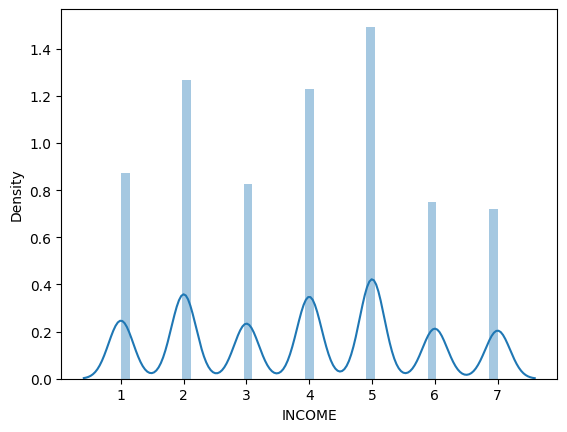

In [ ]:
sns.distplot(numerical['INCOME'])

In [ ]:
numerical['INCOME']=numerical['INCOME'].astype('object')
categorical['INCOME']=numerical['INCOME']
numerical=numerical.drop('INCOME',axis=1)

In [ ]:
categorical['MAILCODE'].value_counts())

     94013
B     1399
Name: MAILCODE, dtype: int64

In [ ]:
drop_list.append('MAILCODE')


In [ ]:
categorical['NOEXCH'].value_counts().index

Index(['0', 0, '1', 1, 'X', ' '], dtype='object')

In [ ]:
categorical['NOEXCH'].value_counts()

0    61203
0    33882
1      195
1       90
X       35
         7
Name: NOEXCH, dtype: int64

In [ ]:
categorical['MDMAUD'].value_counts()

In [ ]:
categorical['DATASRCE'].value_counts()/len(categorical['DATASRCE'])

3    0.456431
2    0.245829
     0.223033
1    0.074708
Name: DATASRCE, dtype: float64

In [ ]:
categorical['DATASRCE'] = categorical['DATASRCE'].replace('','3')


In [ ]:
categorical['GEOCODE2'].value_counts().isna().sum()

0

In [ ]:
drop_list = []
for col_name in numerical.columns:
    if "ADATE" in col_name:
        drop_list.append(col_name)


In [ ]:
drop_list.remove('MAXADATE')

In [ ]:
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24']

In [ ]:
numerical['WEALTH2'].isna().sum()/len(numerical['WEALTH2'])

0.4593028130633463

In [ ]:
numerical['WEALTH2']

0        5.0
1        9.0
2        1.0
3        0.0
4        NaN
        ... 
95407    NaN
95408    NaN
95409    NaN
95410    7.0
95411    8.0
Name: WEALTH2, Length: 95412, dtype: float64

In [ ]:
numerical['WEALTH2'].value_counts()

9.0    6523
8.0    5975
7.0    5684
6.0    5497
5.0    5351
4.0    5074
3.0    5046
2.0    4971
1.0    4191
0.0    3277
Name: WEALTH2, dtype: int64

In [ ]:
numerical['WEALTH2']=numerical['WEALTH2'].fillna(20)

In [ ]:
for i in range (len(numerical['WEALTH2'])):
  if numerical['WEALTH2'][i]==20 :
    numerical['WEALTH2'][i]=numerical['WEALTH1'][i]

In [ ]:
numerical['WEALTH2']=numerical['WEALTH2'].replace(20,np.NAN)

In [ ]:
numerical['WEALTH2'].isna().sum()#/len(numerical['WEALTH2'])

21843

In [ ]:
numerical['WEALTH2'].value_counts()

9.0    9918
8.0    9071
7.0    8380
6.0    8092
5.0    7602
4.0    7108
3.0    6823
2.0    6641
1.0    5645
0.0    4289
Name: WEALTH2, dtype: int64

In [ ]:
df_corr=numerical.corr()

In [ ]:
df_corr_W2=df_corr['WEALTH2'].reset_index()

In [ ]:
for i in range(len(df_corr_W2)):
  if np.abs(df_corr_W2['WEALTH2'][i])>=0.65:
    print(df_corr_W2['index'][i],df_corr_W2['WEALTH2'][i])

WEALTH1 0.9252680038972105
WEALTH2 1.0
IC2 0.6573238113351104
IC4 0.6658557450963869


In [ ]:
numerical['IC4'].isna().sum()

0

In [ ]:
df_piv=numerical[['IC2','IC4','WEALTH2']]

In [ ]:
df_piv_train=df_piv.dropna()

In [ ]:
df_piv_train

,IC2,IC4,WEALTH2
0,318,378,5.0
1,1096,1037,9.0
2,292,340,1.0
3,388,423,0.0
4,250,321,2.0
...,...,...,...
95404,185,236,3.0
95406,288,334,6.0
95408,836,849,9.0
95410,544,556,7.0


In [ ]:
df_piv_test=df_piv[df_piv['WEALTH2'].isna()]

In [ ]:
df_piv_test

,IC2,IC4,WEALTH2
5,410,454,NaN
17,283,313,NaN
19,246,300,NaN
22,389,414,NaN
26,771,895,NaN
...,...,...,...
95397,308,304,NaN
95402,276,342,NaN
95405,266,308,NaN
95407,481,535,NaN


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X=df_piv_train[['IC2','IC4']]
y=df_piv_train['WEALTH2']

In [ ]:
reg=LinearRegression().fit(X,y)

In [ ]:
reg.score(X,y)

0.4451078314509931

In [ ]:
X_test=df_piv_test[['IC2','IC4']]

y_test=reg.predict(X_test)

df_piv_test['WEALTH2']=y_test

In [ ]:
max(y_test)

16.90469555378973

In [ ]:
for i in range (len(df_piv_test['WEALTH2'])):
  df_piv_test['WEALTH2'].iloc[i]=np.round(df_piv_test['WEALTH2'].iloc[i])
  if df_piv_test['WEALTH2'].iloc[i]>9:
    df_piv_test['WEALTH2'].iloc[i]=9

In [ ]:
df_piv_test['WEALTH2'].value_counts()

4.0    6413
5.0    4533
3.0    3729
6.0    2803
7.0    1415
9.0    1024
8.0     861
0.0     588
2.0     458
1.0      19
Name: WEALTH2, dtype: int64

In [ ]:
len(df_piv_test['WEALTH2'])

21843

In [ ]:
for indice in df_piv_test.index:
  numerical['WEALTH2'][indice]=df_piv_test['WEALTH2'][indice]

In [ ]:
df_piv_test['WEALTH2'].values

array([5., 4., 4., ..., 4., 6., 4.])

In [ ]:
numerical['WEALTH2'].isna().sum()


0

In [ ]:
numerical['WEALTH2'].value_counts()

4.0    13521
5.0    12135
9.0    10942
6.0    10895
3.0    10552
8.0     9932
7.0     9795
2.0     7099
1.0     5664
0.0     4877
Name: WEALTH2, dtype: int64

In [ ]:
numerical['TIMELAG'].isna().sum()/(len(numerical['TIMELAG']))

0.10452563618832013

In [ ]:
##CLASE 7.03
from sklearn.feature_selection import RFE # (RECURSIVE FEATURE ALIMINATION)
from sklearn import linear_model
numerical=pd.read_csv('numerical.csv')
y=pd.read_csv('target.txt')['TARGET_D']

lm=linear_model.LinearRegression()

rfe=RFE(lm,n_features_to_select=20)
rfe.fit(numerical,y)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [ ]:
rfe.ranking_

array([294, 283,   1, 210, 196, 168, 229, 231, 195, 230, 237, 225, 141,
       287, 288, 286,   1,   1,   1,  77, 147, 151,   8, 248, 120,   5,
        11, 119, 118,  68,   1,  60, 293,   4,   3,   6,   2, 109, 108,
        69,  81, 136,  70,  82,  39,  38,  40, 107, 137, 106, 202, 193,
        65,  67,  36,  34,  37,  35,  33, 155, 101, 100,  88,  87,  84,
        86, 161,  76, 117,  71, 234, 224, 235,  85,  30, 198,   1,  32,
         1, 144,  79, 110,  78, 290, 278, 124,   1,  24,  21,  29,  28,
       274,  18,  80,  22,  19,  83, 146,  14,  13,  15,  20,  23,  89,
       152, 153,  66,  10,   9,   7, 185, 253, 265, 256, 257, 217, 149,
       150,  58,  59,  17,   1,   1,   1,  31, 176, 245, 145, 197, 189,
       188, 261, 241, 295, 289, 268, 269, 239, 266, 252, 292, 133, 132,
       130, 129, 128, 111, 258, 126, 131, 264, 259, 270, 249, 251, 112,
       127, 250, 125, 173, 158, 200, 159,   1,   1, 208,  55,  56,   1,
         1,   1,   1,  16,  57,  54, 262, 271, 160, 219, 177, 24

In [ ]:
df_calis=pd.DataFrame(data=rfe.ranking_,columns=['Rank'])
df_calis['Column_name']=numerical.columns

In [ ]:
df_calis[df_calis['Rank']==1]

# (['TCODE', 'POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C3', 'HHP1',
#        'HHP2', 'HV1', 'HV2', 'HVP2', 'HVP3', 'HVP4', 'RP1', 'RP2', 'RP3',
#        'MSA', 'ADI', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'LFC9', 'HC6',
#        'HC7', 'HC11', 'HC19', 'RAMNTALL', 'CONTROLN'

,Rank,Column_name
2,1,INCOME
16,1,POP90C1
17,1,POP90C2
18,1,POP90C3
30,1,ETH10
76,1,DW3
78,1,DW5
86,1,HV4
121,1,RHP4
122,1,HUPA1


In [ ]:
numerical.columns

Index(['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET',
       'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
       'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT',
       'CONTROLN', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=315)

In [ ]:
#VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=(1000.9))

sel=sel.fit(numerical)
#el "problema" de este método es que no te devuelve el nombre de las columnas y te hace el corte de columnas
#automáticamente
temp=sel.transform(numerical)

print(numerical.shape)
print(temp.shape)


(95412, 315)
(95412, 31)


In [ ]:
sel.get_support()

In [ ]:
numerical2=numerical[numerical.columns[sel.get_support(indices=True)]]

In [ ]:
numerical2.columns

Index(['TCODE', 'POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C3', 'HHP1',
       'HHP2', 'HV1', 'HV2', 'HVP2', 'HVP3', 'HVP4', 'RP1', 'RP2', 'RP3',
       'MSA', 'ADI', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'LFC9', 'HC6',
       'HC7', 'HC11', 'HC19', 'RAMNTALL', 'CONTROLN'],
      dtype='object')

<Axes: >

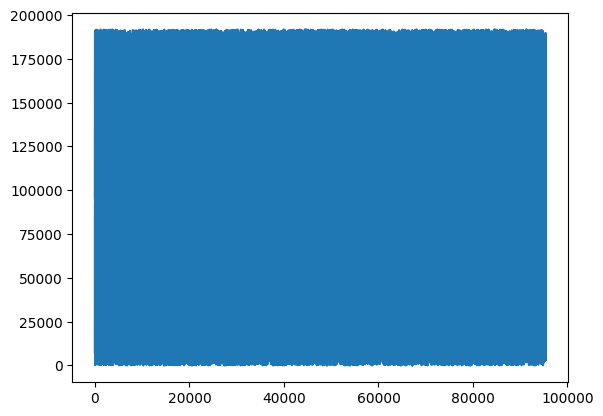

In [ ]:
numerical['CONTROLN'].plot()